In [87]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [88]:
from url_dict import url_dict

In [89]:
def get_table(url, div_class, table_class):
    # Send a GET request to fetch the raw HTML content
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find the specific div containing the table
    table_wrap = soup.find('div', class_=div_class)

    # Check if the table_wrap was found
    if table_wrap:
        # Extract the table data
        table = table_wrap.find('table', class_=table_class)

        # Prepare lists to hold the data
        headers = []
        data = []

        # Extract headers
        for th in table.find('thead').find_all('th'):
            headers.append(th.text.strip())

        # Extract rows
        for row in table.find('tbody').find_all('tr'):
            row_data = [td.text.strip() for td in row.find_all('td')]
            data.append(row_data)

        # Create a DataFrame
        df = pd.DataFrame(data, columns=headers)

    else:
        print("Table not found")
    return df

In [90]:
result_ranking_full = None
for k,v in url_dict.items():
    print(k)
    for url in v:
        if "paris24/results" in url:
            result_table = get_table(url, div_class='TableCollapsible_tableWrap__2nsKT', table_class='Table_table__2zsdR')
        elif "world-rankings" in url:
            rankings_table = get_table(url, div_class='table-wrapper', table_class='records-table')
        else:
            print("Cannot assign div or table class")
    result_ranking = result_table.merge(rankings_table, how='left', left_on='Athlete', right_on='Competitor')
    result_ranking['Event'] = k
    result_ranking['World Ranking'] = result_ranking['Place'].astype(float)
    result_ranking['World Ranking Rank'] = result_ranking['World Ranking'].rank(method="min", na_option="bottom").astype("Int64")
    result_ranking.rename(columns={'Pos': 'Finish Place'}, inplace=True)
    result_ranking_temp = result_ranking[['Event','Athlete','Country','Finish Place','World Ranking','World Ranking Rank']]
    try:
        result_ranking_full = pd.concat([result_ranking_full, result_ranking_temp], ignore_index=True)
    except:
        result_ranking_full = result_ranking_temp
        
        

100m Men
100m Women
200m Men
200m Women
400m Men
400m Women
800m Men
800m Women
1500m Men
1500m Women
5000m Men
5000m Women
10000m Men
10000m Women
3000m Steeplechase Men
3000m Steeplechase Women
Marathon Men
Marathon Women
110m Hurdles Men
100m Hurdles Women
400m Hurdles Men
400m Hurdles Women
Long Jump Men
Long Jump Women
High Jump Men
High Jump Women
Triple Jump Men
Triple Jump Women
Pole Vault Men
Pole Vault Women
Javelin Throw Men
Javelin Throw Women
Discus Throw Men
Discus Throw Women
Hammer Throw Men
Hammer Throw Women
Shot Put Men
Shot Put Women


In [91]:
result_ranking_full

,Event,Athlete,Country,Finish Place,World Ranking,World Ranking Rank
0,100m Men,Noah LYLES,USA,1,1.0,1
1,100m Men,Kishane THOMPSON,JAM,2,6.0,4
2,100m Men,Fred KERLEY,USA,3,13.0,7
3,100m Men,Akani SIMBINE,RSA,4,7.0,5
4,100m Men,Lamont Marcell JACOBS,ITA,5,12.0,6
...,...,...,...,...,...,...
608,Shot Put Women,Jessica INCHUDE,POR,8,21.0,11
609,Shot Put Women,Alina KENZEL,GER,9,22.0,12
610,Shot Put Women,Axelina JOHANSSON,SWE,10,18.0,10
611,Shot Put Women,Raven SAUNDERS,USA,11,16.0,9


In [92]:
len(result_ranking_full["Event"].unique())

38

In [93]:
sprints = [
    "100m Men", "100m Women", "200m Men", "200m Women", "400m Men", "400m Women",
    "110m Hurdles Men", "100m Hurdles Women", "400m Hurdles Men", "400m Hurdles Women"
]

middle_distance = [
    "800m Men", "800m Women", "1500m Men", "1500m Women"
]

distance = [
    "5000m Men", "5000m Women", "10000m Men", "10000m Women", 
    "3000m Steeplechase Men", "3000m Steeplechase Women", 
    "Marathon Men", "Marathon Women"
]

throws = [
    "Javelin Throw Men", "Javelin Throw Women", 
    "Discus Throw Men", "Discus Throw Women", 
    "Hammer Throw Men", "Hammer Throw Women", 
    "Shot Put Men", "Shot Put Women"
]

jumps = [
    "Long Jump Men", "Long Jump Women", 
    "High Jump Men", "High Jump Women", 
    "Triple Jump Men", "Triple Jump Women", 
    "Pole Vault Men", "Pole Vault Women"
]

In [94]:
def categorize_event(event):
    if event in sprints:
        return "Sprints"
    elif event in middle_distance:
        return "Middle Distance"
    elif event in distance:
        return "Distance"
    elif event in throws:
        return "Throws"
    elif event in jumps:
        return "Jumps"
    else:
        return "Unknown"

# Apply the function to the 'Event' column to create the 'Event type' column
result_ranking_full['Event type'] = result_ranking_full['Event'].apply(categorize_event)

In [95]:
def medal_boolean(place):
    if place in ['1','2','3']:
        return True
    else:
        return False

result_ranking_full['Medal'] = result_ranking_full['Finish Place'].apply(medal_boolean)

In [96]:
result_ranking_full['No World Rank'] = result_ranking_full['World Ranking'].isnull()

In [99]:
csv_file_path = 'olympic_2024_wrk.csv'
result_ranking_full.to_csv(csv_file_path, index=False) 

In [97]:
result_ranking_full[result_ranking_full['No World Rank']]

,Event,Athlete,Country,Finish Place,World Ranking,World Ranking Rank,Event type,Medal,No World Rank
55,800m Men,Max BURGIN,GBR,8,NaN,8,Middle Distance,False,True
87,1500m Women,Gudaf TSEGAY,ETH,12,NaN,12,Middle Distance,False,True
94,5000m Men,Edwin KURGAT,KEN,7,NaN,20,Distance,False,True
103,5000m Men,Hugo HAY,FRA,16,NaN,20,Distance,False,True
108,5000m Men,George MILLS,GBR,21,NaN,20,Distance,False,True
...,...,...,...,...,...,...,...,...,...
463,Triple Jump Men,Pedro PICHARDO,POR,2,NaN,10,Jumps,True,True
465,Triple Jump Men,Jaydon HIBBERT,JAM,4,NaN,10,Jumps,False,True
468,Triple Jump Men,Max HESS,GER,7,NaN,10,Jumps,False,True
517,Javelin Throw Men,Arshad NADEEM,PAK,1,NaN,12,Throws,True,True


In [98]:
result_ranking_full.groupby('Medal').aggregate({'No World Rank':['count','sum']})

No World Rank     
              count  sum
Medal                   
False           498  137
True            115    5

In [37]:
result_ranking_full[(result_ranking_full['No World Rank']) & (result_ranking_full['Medal'])]

,Event,Athlete,Country,Finish Place,World Ranking,World Ranking Rank,Event type,Medal,No World Rank
153,10000m Women,Beatrice CHEBET,KEN,1,NaN,22,Distance,True,True
194,3000m Steeplechase Women,Winfred Mutile YAVI,BRN,1,NaN,14,Distance,True,True
405,400m Hurdles Women,Sydney MCLAUGHLIN-LEVRONE,USA,1,NaN,8,Sprints,True,True
463,Triple Jump Men,Pedro PICHARDO,POR,2,NaN,10,Jumps,True,True
517,Javelin Throw Men,Arshad NADEEM,PAK,1,NaN,12,Throws,True,True


In [40]:
medals = result_ranking_full[result_ranking_full['Medal']]
medals.head()

,Event,Athlete,Country,Finish Place,World Ranking,World Ranking Rank,Event type,Medal,No World Rank
0,100m Men,Noah LYLES,USA,1,1.0,1,Sprints,True,False
1,100m Men,Kishane THOMPSON,JAM,2,6.0,4,Sprints,True,False
2,100m Men,Fred KERLEY,USA,3,13.0,7,Sprints,True,False
8,100m Women,Julien ALFRED,LCA,1,3.0,2,Sprints,True,False
9,100m Women,Sha'Carri RICHARDSON,USA,2,1.0,1,Sprints,True,False


In [41]:
gold = medals[medals['Finish Place']=='1']
silver = medals[medals['Finish Place']=='2']
bronze = medals[medals['Finish Place']=='3']

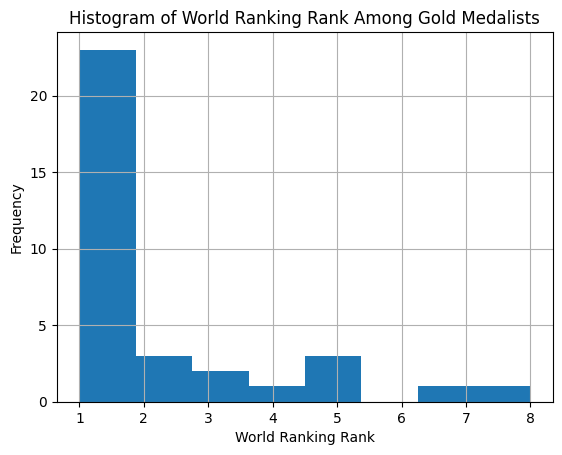

In [53]:
import matplotlib.pyplot as plt

gold[~gold['World Ranking'].isnull()]['World Ranking Rank'].hist(bins=gold[~gold['World Ranking'].isnull()]['World Ranking Rank'].max())

# Add labels and title
plt.xlabel('World Ranking Rank')
plt.ylabel('Frequency')
plt.title('Histogram of World Ranking Rank Among Gold Medalists')

# Display the plot
plt.show()

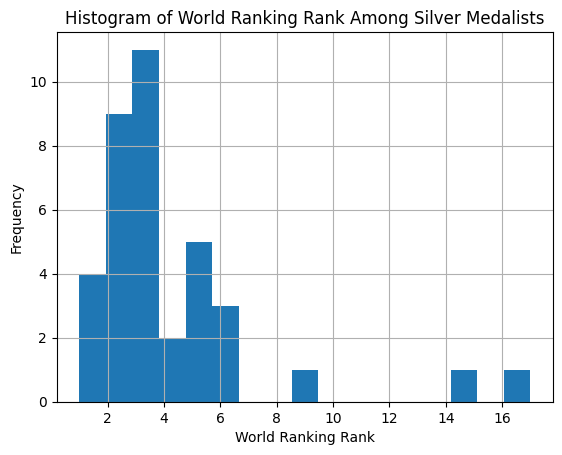

In [54]:
silver[~silver['World Ranking'].isnull()]['World Ranking Rank'].hist(bins=silver[~silver['World Ranking'].isnull()]['World Ranking Rank'].max())

# Add labels and title
plt.xlabel('World Ranking Rank')
plt.ylabel('Frequency')
plt.title('Histogram of World Ranking Rank Among Silver Medalists')

# Display the plot
plt.show()

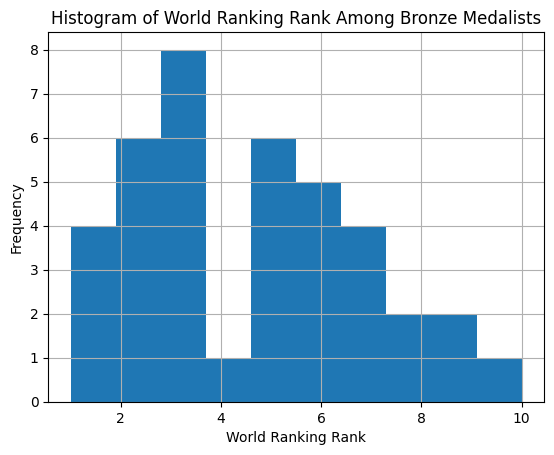

In [55]:
bronze[~bronze['World Ranking'].isnull()]['World Ranking Rank'].hist(bins=bronze[~bronze['World Ranking'].isnull()]['World Ranking Rank'].max())

# Add labels and title
plt.xlabel('World Ranking Rank')
plt.ylabel('Frequency')
plt.title('Histogram of World Ranking Rank Among Bronze Medalists')

# Display the plot
plt.show()

In [62]:
help(sns.histplot)

Help on function histplot in module seaborn.distributions:

histplot(data=None, *, x=None, y=None, hue=None, weights=None, stat='count', bins='auto', binwidth=None, binrange=None, discrete=None, cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', fill=True, shrink=1, kde=False, kde_kws=None, line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None, cbar_kws=None, palette=None, hue_order=None, hue_norm=None, color=None, log_scale=None, legend=True, ax=None, **kwargs)
    Plot univariate or bivariate histograms to show distributions of datasets.
    
    A histogram is a classic visualization tool that represents the distribution
    of one or more variables by counting the number of observations that fall within
    discrete bins.
    
    This function can normalize the statistic computed within each bin to estimate
    frequency, density or probability mass, and it can add a smooth curve obtained
    using a kernel density estimate

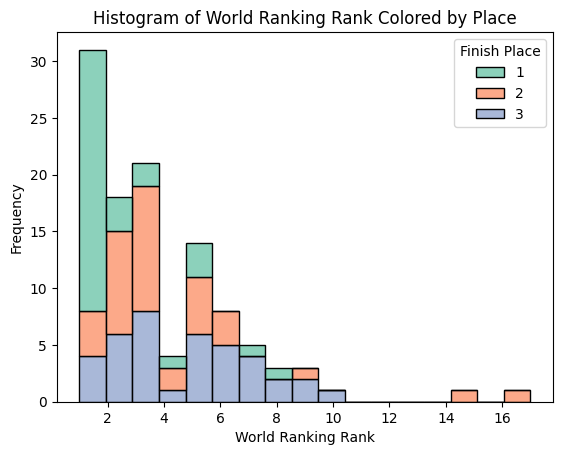

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the histogram with seaborn
sns.histplot(data=medals[~medals['No World Rank']], x='World Ranking Rank', hue='Finish Place', multiple='stack', palette='Set2', edgecolor='black', bins=medals[~medals['No World Rank']]['World Ranking Rank'].max())

# Add labels and title
plt.xlabel('World Ranking Rank')
plt.ylabel('Frequency')
plt.title('Histogram of World Ranking Rank Colored by Place')

# Display the plot
plt.show()


In [74]:
# How often do athletes with the best world rankings get gold? Silver? Bronze? How often are they out of the medals altogether? Do these proportions vary substantially based on event groups?

event_count = result_ranking_full['Event'].unique().shape[0]


In [78]:
result_ranking_full[result_ranking_full['World Ranking Rank']==1].groupby('Finish Place').aggregate({'Athlete':'count'})/event_count

,Athlete
Finish Place,
1,0.605263
12,0.026316
2,0.105263
3,0.105263
4,0.052632
5,0.052632
6,0.052632


In [81]:
result_ranking_full

,Event,Athlete,Country,Finish Place,World Ranking,World Ranking Rank,Event type,Medal,No World Rank
0,100m Men,Noah LYLES,USA,1,1.0,1,Sprints,True,False
1,100m Men,Kishane THOMPSON,JAM,2,6.0,4,Sprints,True,False
2,100m Men,Fred KERLEY,USA,3,13.0,7,Sprints,True,False
3,100m Men,Akani SIMBINE,RSA,4,7.0,5,Sprints,False,False
4,100m Men,Lamont Marcell JACOBS,ITA,5,12.0,6,Sprints,False,False
...,...,...,...,...,...,...,...,...,...
608,Shot Put Women,Jessica INCHUDE,POR,8,21.0,11,Throws,False,False
609,Shot Put Women,Alina KENZEL,GER,9,22.0,12,Throws,False,False
610,Shot Put Women,Axelina JOHANSSON,SWE,10,18.0,10,Throws,False,False
611,Shot Put Women,Raven SAUNDERS,USA,11,16.0,9,Throws,False,False


In [84]:
event_count_by_type = result_ranking_full.groupby('Event type').aggregate({'Event':'nunique'})
event_count_by_type

,Event
Event type,
Distance,8
Jumps,8
Middle Distance,4
Sprints,10
Throws,8


In [86]:
best_world_rank_by_event_type = result_ranking_full[result_ranking_full['World Ranking Rank']==1].groupby(['Finish Place','Event type']).aggregate({'Athlete':'count'})
best_world_rank_by_event_type.reset_index().merge(event_count_by_type, 'inner', 'Event type')

,Finish Place,Event type,Athlete,Event
0,1,Distance,4,8
1,1,Jumps,6,8
2,1,Middle Distance,3,4
3,1,Sprints,5,10
4,1,Throws,5,8
5,12,Throws,1,8
6,2,Distance,1,8
7,2,Sprints,2,10
8,2,Throws,1,8
9,3,Distance,1,8


In [ ]:
# How often do athletes outside the top 3 WRK get a medal?